comparing regional CS2_CPOM and SM-LG smoothed anomalies for 2010-2020 seasons 1 Dec - 30 Apr

In [1]:
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib import gridspec
import datetime
import seaborn as sns
import os
import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
20191017T0000Z_cice_history_file.2019-10-17.nc

In [4]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_regional_anomalies_smoothed.csv',header=[0,1,2])
regions = ['Baffin','Greenland','Barents','Kara','Laptev','Sib','Chuk','Bea','Can','Cen']
random_SM = ['Unnamed: 91_level_2','Unnamed: 92_level_2','Unnamed: 93_level_2','Unnamed: 94_level_2','Unnamed: 95_level_2',
             'Unnamed: 96_level_2','Unnamed: 97_level_2','Unnamed: 98_level_2','Unnamed: 99_level_2','Unnamed: 100_level_2']
seasons = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019',
          '2019-2020']

dates = df['Unnamed: 0_level_0']['Unnamed: 0_level_1']['Date']

# 1 Oct - 30 April
days = [np.arange(273,484), # 2010-2011
        np.arange(638,850), # 2011-2012
        np.arange(1004,1215), # 2012-2013
        np.arange(1369,1580), # 2013-2014
        np.arange(1734,1945), # 2014-2015
        np.arange(2099,2311), # 2015-2016
        np.arange(2464,2676), # 2016-2017
        np.arange(2830,3041), # 2017-2018
        np.arange(3194,3406), # 2018-2019
        np.arange(3560,3772) # 2019-2020
       ]

In [5]:
def stats():
    fb = df[sat][region][rando_C][day]
    snow = df['SM'][region][rando_S][day]
    mask = ~np.isnan(snow) & ~np.isnan(fb) 
    try:
        rstats = linregress(snow[mask],fb[mask])
        s = rstats.slope
        p = rstats.pvalue
        return(p,s)
    except:
        print(region,': no data')

# Regional stats table

In [7]:
Baf = {}
Green = {}
Bar = {}
Kara = {}
Laptev = {}
Sib = {} 
Chuk = {} 
Bea = {}
Can = {}
Cen = {}

ps_table = np.full((10,10),np.nan)

counters = np.arange(0,10)

dics = [Baf,Green,Bar,Kara,Laptev,Sib,Chuk,Bea,Can,Cen]

random_CPOM = ['Unnamed: 21_level_2','Unnamed: 22_level_2','Unnamed: 23_level_2','Unnamed: 24_level_2','Unnamed: 25_level_2',
               'Unnamed: 26_level_2','Unnamed: 27_level_2','Unnamed: 28_level_2','Unnamed: 29_level_2','Unnamed: 30_level_2']
sat = 'CS2_CPOM'
    
for region, rando_C, rando_S, dic, counter in zip(regions, random_CPOM, random_SM, dics, counters):
    for season, day, count in zip(seasons, days, counters):
        p,s = stats()
        dic[season] = s
        ps_table[count,counter] = p
    
df_Baf = pd.DataFrame.from_dict(Baf, columns=[' '], orient = 'index')
df_Green = pd.DataFrame.from_dict(Green, columns=[' '], orient = 'index')
df_Bar = pd.DataFrame.from_dict(Bar, columns=[' '], orient = 'index')
df_Kara = pd.DataFrame.from_dict(Kara, columns=[' '], orient = 'index')
df_Laptev = pd.DataFrame.from_dict(Laptev, columns=[' '], orient = 'index')
df_Sib = pd.DataFrame.from_dict(Sib, columns=[' '], orient = 'index')
df_Chuk = pd.DataFrame.from_dict(Chuk, columns=[' '], orient = 'index')
df_Bea = pd.DataFrame.from_dict(Bea, columns=[' '], orient = 'index')
df_Can = pd.DataFrame.from_dict(Can, columns=[' '], orient = 'index')
df_Cen = pd.DataFrame.from_dict(Cen, columns=[' '], orient = 'index')

In [8]:
sets = [df_Baf,df_Green,df_Bar,df_Kara,df_Laptev,df_Sib,df_Chuk,df_Bea,df_Can,df_Cen] 

df_combined = pd.concat(
    [df.rename(columns=lambda x: x.zfill(0)) for df in sets],
    keys=['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic'],
    axis=1)

In [9]:
df_combined

,Baffin,Greenland,Barents,Kara,Laptev,E. Siberian,Chukchi,Beaufort,Can. Arch.,Central Arctic
,,,,,,,,,,
2010-2011,-0.191794,0.145511,0.277401,-0.241665,-0.196108,0.095660,0.532723,0.007552,-0.113789,-1.433667
2011-2012,-0.550987,0.388688,0.075207,-0.384864,-0.107802,-0.228380,-0.021205,-0.233031,-0.020865,-0.287015
2012-2013,0.298133,0.136992,-1.094774,-0.403840,0.490762,0.263274,-0.018061,-0.177411,0.018754,-0.194599
2013-2014,-0.157694,0.507945,-1.495567,0.040028,0.245203,0.789422,0.417295,-0.323508,0.325621,-0.224870
2014-2015,-0.127715,0.429446,-0.633370,0.056101,0.199121,-0.277414,-0.175473,-0.192387,-0.113172,-0.142333
2015-2016,-0.339921,0.359805,0.798571,0.403519,0.072015,0.190714,0.136735,0.358966,0.372617,0.028651
2016-2017,-0.003144,0.169494,0.814347,-0.316040,-0.476029,0.217365,-0.281769,0.187070,0.375171,0.073834
2017-2018,-0.930005,0.408191,0.577759,-0.062374,0.491241,0.321091,0.296553,-0.026709,-0.161119,-0.337809
2018-2019,-0.069290,0.092045,0.474083,-0.009183,-0.454702,0.026779,0.259186,0.052810,0.276897,0.160963


In [ ]:
# MYI boundary
all_MYI = []
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/icetype/'

days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]

all_MYI=np.full((4018,1120, 760),np.nan)

for day in days:#key is a date, so looping through each day for which we have gridded CS2 obs in this season
    date = dates[day].strftime('%Y%m%d')
    try:
        icetype = Dataset(datapath+'ice_type_nh_polstere-100_multi_'+str(date)+'1200.nc')
        ice_type = np.asarray(icetype['ice_type'][0])
        ice_type[ice_type>3]=0
        ice_type[ice_type<3]=0 
        ice_type[ice_type==3]=1
        all_MYI[day] = ice_type
    except:
        pass
    
MYI_days = (all_MYI == 1).sum(axis = 0).astype(np.float32)    
icetype_lon = np.array(icetype['lon'])
icetype_lat = np.array(icetype['lat'])
total = len(dayss[0])+len(dayss[1])+len(dayss[2])+len(dayss[3])+len(dayss[4])+len(dayss[5])+len(dayss[6])+len(dayss[7])+len(dayss[8])+len(dayss[9])
day_ave = MYI_days/total
day_ave[icetype_lat>89]=0.6 # remove polehole

In [ ]:
# plot combined figure

In [ ]:
# Map showing gridcell-by-gridcell slope between SM-LG and CS2_CPOM interpolated freeboards 
# smoothed anomalies for full 2010-2020 period. Grey areas are where p>0.05

lats = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lat.npy')
lons = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lon.npy')

ss[ps>0.05] = 1000
grey = ss.copy()
grey[grey <1000] = np.nan
ss[ss==1000] = np.nan

fig = plt.figure(figsize=(20,27))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 1],hspace=0)

ax1 = fig.add_subplot(spec[0],projection=ccrs.NorthPolarStereo())


ax1.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax1.pcolormesh(lons,lats,rs_map,cmap='RdBu',vmin=-0.15,vmax=0.15,alpha=1.0, transform=ccrs.PlateCarree())
ax1.pcolormesh(lons,lats,grey,cmap='Greys',vmin=0,vmax=6000,alpha=1.0, transform=ccrs.PlateCarree())
ax1.set_title('a)', x = -0.01,y = 1,fontweight="bold")
a = fig.colorbar(p_map,shrink=0.82,aspect=30)
a.set_label("Slope",fontsize='x-large',labelpad=20)

lon2d_greater = ma.masked_greater(np.array(icetype_lon), -0.01)
lon2d_lesser = ma.masked_less(np.array(icetype_lon), 0)

lat2d_greater = ma.MaskedArray(np.array(icetype_lat), mask=lon2d_greater.mask)
lat2d_lesser = ma.MaskedArray(np.array(icetype_lat), mask=lon2d_lesser.mask)

ice_type_lesser = ma.MaskedArray(day_ave, mask=lon2d_lesser.mask)
ice_type_greater = ma.MaskedArray(day_ave, mask=lon2d_greater.mask)

cont_less = ax.contour(lon2d_lesser,
                  lat2d_lesser,
                  ice_type_lesser,
                  levels=[0.5],
                  transform=ccrs.PlateCarree(),
                  colors='k',
                  linewidths=1.0)

cont_Great = ax.contour(lon2d_greater,
                  lat2d_greater,
                  ice_type_greater,
                  levels=[0.5],
                  transform=ccrs.PlateCarree(),
                  colors='k',
                  linewidths=1.0)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/AGU GRL Snow Interpolated Freeboards/figures/CS2_gridcells_slope.png',bbox_inches = "tight")

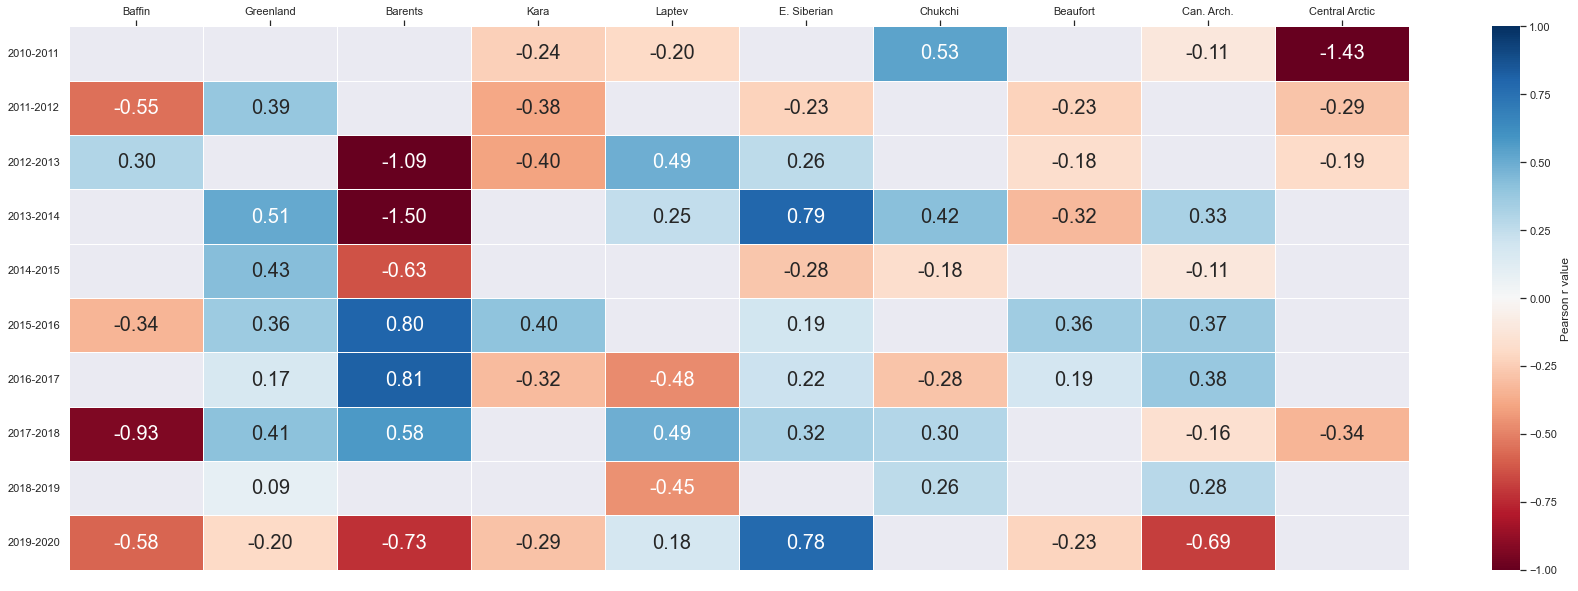

In [11]:
mask = ps_table.copy()
mask[mask>0.05] = 1000
mask[mask<1000] = 0

keys = ['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic']
ax = sns.heatmap(df_combined, mask=mask, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1,linewidths=0.5, annot_kws={"fontsize":20}, yticklabels=seasons)
sns.set(rc = {'figure.figsize':(30,10)})
ax.xaxis.tick_top()
ax.set_xlabel(' ')    
ax.set_yticklabels(seasons,rotation = 0)
ax.set_xticklabels(keys)
ax.collections[0].colorbar.set_label("Pearson r value")

# for (j,i), label in np.ndenumerate(df_combined.values):
#     if mask[j,i] == 1000:
#         ax.text(i+0.5, j+0.5, label, 
#                 fontdict=dict(ha='center',  va='center',
#                                          color='k', fontsize=20))
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/regional_stats_slope.png',bbox_inches = "tight")